2024-01-11 16:56:47.724172: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-11 16:56:47.727046: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 16:56:47.753353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 16:56:47.753382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 16:56:47.753997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

313/313 [==============================] - 0s 1ms/step


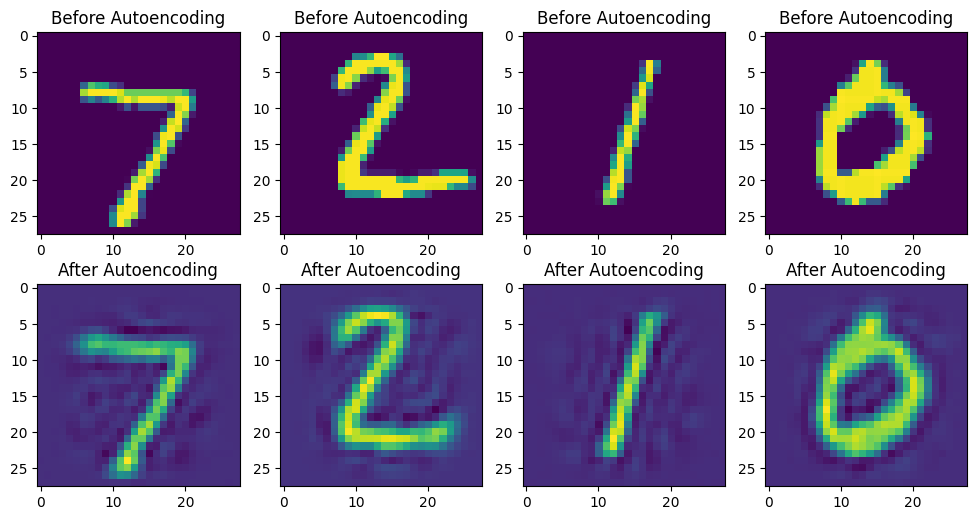

In [1]:
# Initializations and showing images
import numpy as np
import random
import matplotlib.pyplot as plt
import keras
from scipy import stats

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

x_train = np.load('mnist/x_train.npy')
y_train = np.load('mnist/y_train.npy')
x_test = np.load('mnist/x_test.npy')
y_test = np.load('mnist/y_test.npy')

test_images = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0
autoencoder = keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

temp1 = ['Before Autoencoding'] * 4
temp2 = ['After Autoencoding'] * 4
titles = temp1 + temp2
all_images = [test_images[i] for i in range(4)] + [reconstructed_images[i] for i in range(4)]
fig, axs = plt.subplots(2, 4, figsize=(12,6))
# Flattening 2D subplots into 1D array
axs = axs.ravel()
for i in range(8):
    all_images[i] = all_images[i].reshape(28,28)
for i in range(8):
    axs[i].imshow(all_images[i])
    axs[i].set_title(titles[i])

plt.show()

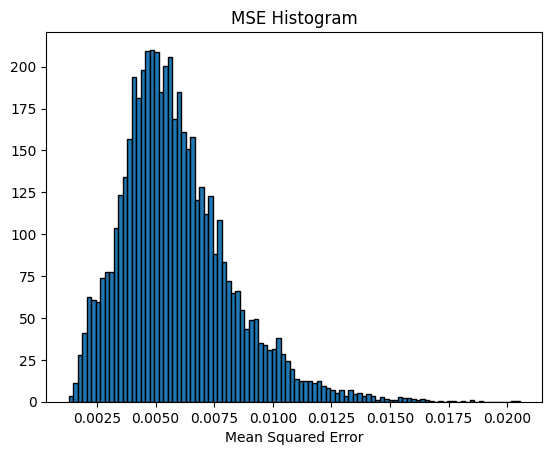

In [2]:
#Calculating MSE for the reconstructed images
def calc_MSE_values(test_images, reconstructed_images):
    mse = np.zeros(test_images.shape[0])
    for i in range(test_images.shape[0]):
        mse[i] = np.mean((test_images[i] - reconstructed_images[i])**2)
    return mse

mse = calc_MSE_values(test_images, reconstructed_images)
plt.hist(mse, bins=100, edgecolor='black',density=True)
plt.title('MSE Histogram')
plt.xlabel('Mean Squared Error')
plt.show()



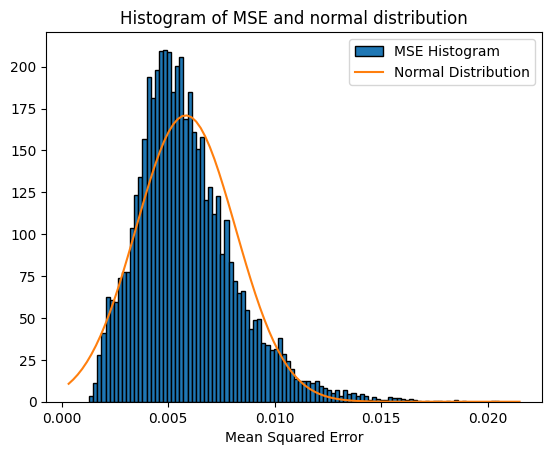

K-S Statistic: 0.08296953040837984
P-value: 1.948921527504168e-06
The MSE values does not follow a normal distribution.


In [3]:
#Checking normal distribution
mse_sample = np.random.choice(mse,size=1000,replace=False)
sample_mean = np.mean(mse_sample)
sample_std = np.std(mse_sample)

ks_statistic, p_value = stats.kstest(mse_sample, 'norm', args=(sample_mean, sample_std))

plt.hist(mse, bins=100, edgecolor='black', density=True, label='MSE Histogram')
plt.title('Histogram of MSE and normal distribution')
plt.xlabel('Mean Squared Error')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, sample_mean, sample_std)
plt.plot(x, p, label='Normal Distribution')

plt.legend()
plt.show()

print(f'K-S Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

# significance level : 0.05
if p_value > 0.05:
    print("The MSE values follow a normal distribution.")
else:
    print("The MSE values does not follow a normal distribution.")
